# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather = weather_json["weather"]
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | lebanon
Processing Record 3 of Set 1 | grand gaube
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | berdigestyakh
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | hailar
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | kloulklubed
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | rafai
Processing Record 22 of Set 1 | vaini
Pr

Processing Record 40 of Set 4 | el dorado
Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | verkhnevilyuysk
Processing Record 44 of Set 4 | arroyo
Processing Record 45 of Set 4 | san antonio
Processing Record 46 of Set 4 | zyryanka
Processing Record 47 of Set 4 | port lincoln
Processing Record 48 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 4 | warqla
City not found. Skipping...
Processing Record 0 of Set 5 | decatur
Processing Record 1 of Set 5 | saurimo
Processing Record 2 of Set 5 | sao felix do xingu
Processing Record 3 of Set 5 | tilichiki
Processing Record 4 of Set 5 | ramanuj ganj
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | port hardy
Processing Record 7 of Set 5 | mahebourg
Processing Record 8 of Set 5 | izumo
Processing Record 9 of Set 5 | klaksvik
Processing Record 10 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 5 |

Processing Record 24 of Set 8 | margate
Processing Record 25 of Set 8 | bowen
Processing Record 26 of Set 8 | gamba
Processing Record 27 of Set 8 | djambala
Processing Record 28 of Set 8 | rocha
Processing Record 29 of Set 8 | raudeberg
Processing Record 30 of Set 8 | taksimo
Processing Record 31 of Set 8 | iguape
Processing Record 32 of Set 8 | bouca
Processing Record 33 of Set 8 | boyuibe
Processing Record 34 of Set 8 | kamaishi
Processing Record 35 of Set 8 | isangel
Processing Record 36 of Set 8 | lucapa
Processing Record 37 of Set 8 | seredeyskiy
Processing Record 38 of Set 8 | totoral
Processing Record 39 of Set 8 | santa rosa
Processing Record 40 of Set 8 | hambantota
Processing Record 41 of Set 8 | nieuw nickerie
Processing Record 42 of Set 8 | tomatlan
Processing Record 43 of Set 8 | kieta
Processing Record 44 of Set 8 | athabasca
Processing Record 45 of Set 8 | buchanan
Processing Record 46 of Set 8 | san andres
Processing Record 47 of Set 8 | high rock
Processing Record 48 o

Processing Record 11 of Set 12 | dickinson
Processing Record 12 of Set 12 | nishihara
Processing Record 13 of Set 12 | tuy hoa
Processing Record 14 of Set 12 | peleduy
Processing Record 15 of Set 12 | tuensang
Processing Record 16 of Set 12 | makakilo city
Processing Record 17 of Set 12 | paragominas
Processing Record 18 of Set 12 | marang
Processing Record 19 of Set 12 | markova
Processing Record 20 of Set 12 | south valley
Processing Record 21 of Set 12 | wieliczka
Processing Record 22 of Set 12 | sao filipe
Processing Record 23 of Set 12 | kirensk
Processing Record 24 of Set 12 | bull savanna
Processing Record 25 of Set 12 | pasvalys
Processing Record 26 of Set 12 | peniche
Processing Record 27 of Set 12 | samusu
City not found. Skipping...
Processing Record 28 of Set 12 | lewiston
Processing Record 29 of Set 12 | andra
Processing Record 30 of Set 12 | vigrestad
Processing Record 31 of Set 12 | chunskiy
Processing Record 32 of Set 12 | aracruz
Processing Record 33 of Set 12 | bela
P

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,1.12,95,36,3.03,RU,1684202280
1,lebanon,36.2081,-86.2911,23.96,88,0,3.09,US,1684202226
2,grand gaube,-20.0064,57.6608,24.65,76,29,0.89,MU,1684202280
3,saskylakh,71.9167,114.0833,-6.65,88,94,0.89,RU,1684202281
4,tasiilaq,65.6145,-37.6368,-3.10,78,100,2.52,GL,1684202281


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,1.12,95,36,3.03,RU,1684202280
1,lebanon,36.2081,-86.2911,23.96,88,0,3.09,US,1684202226
2,grand gaube,-20.0064,57.6608,24.65,76,29,0.89,MU,1684202280
3,saskylakh,71.9167,114.0833,-6.65,88,94,0.89,RU,1684202281
4,tasiilaq,65.6145,-37.6368,-3.10,78,100,2.52,GL,1684202281


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

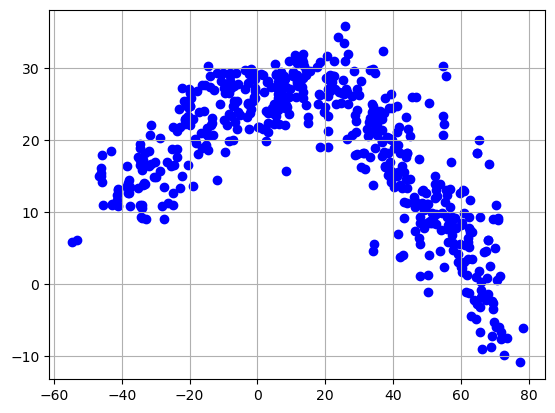

In [35]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, color = "blue")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

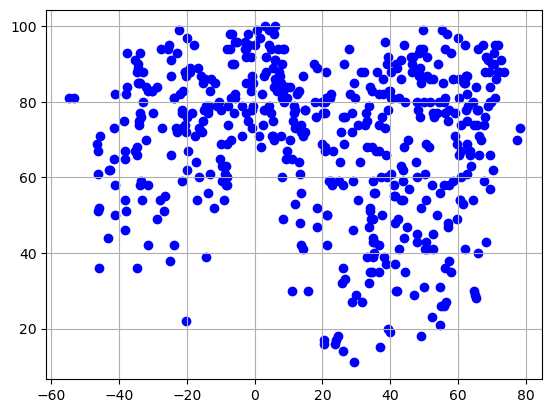

In [36]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, color = "blue")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

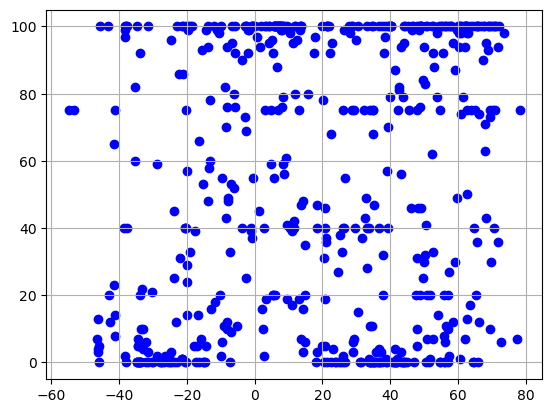

In [37]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, color = "blue")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

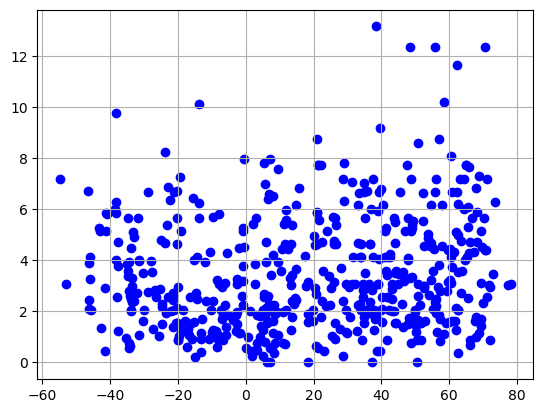

In [38]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, color = "blue")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line = "y" + str(round(slope, 2)) + "x + str(round(intercept, 2))"
    plt.scatter(x,y)
    plt.grid()
    plt.plot(x, regress_values, "r-")
    plt.show()

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,1.12,95,36,3.03,RU,1684202280
1,lebanon,36.2081,-86.2911,23.96,88,0,3.09,US,1684202226
3,saskylakh,71.9167,114.0833,-6.65,88,94,0.89,RU,1684202281
4,tasiilaq,65.6145,-37.6368,-3.10,78,100,2.52,GL,1684202281
5,berdigestyakh,62.0989,126.6992,5.78,95,100,2.13,RU,1684202281


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grand gaube,-20.0064,57.6608,24.65,76,29,0.89,MU,1684202280
6,faanui,-16.4833,-151.7500,27.63,73,66,2.57,PF,1684202281
7,mataura,-46.1927,168.8643,15.01,61,13,2.44,NZ,1684202281
8,arraial do cabo,-22.9661,-42.0278,21.83,72,100,6.89,BR,1684202281
11,busselton,-33.6500,115.3333,17.16,59,0,2.99,AU,1684202282


###  Temperature vs. Latitude Linear Regression Plot

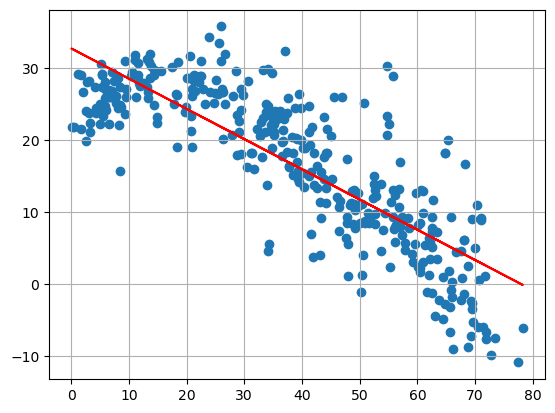

In [42]:
# Linear regression on Northern Hemisphere
temp_north = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
temp_north

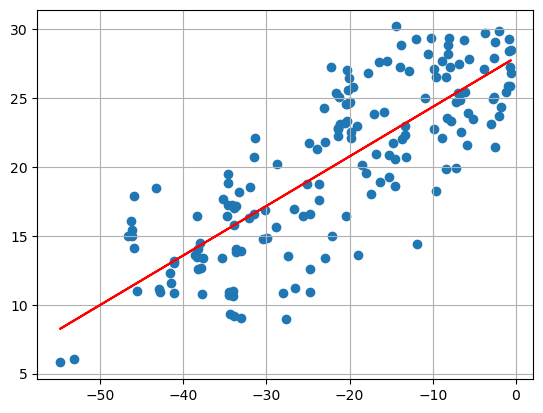

In [43]:
# Linear regression on Southern Hemisphere
temp_south = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
temp_south

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

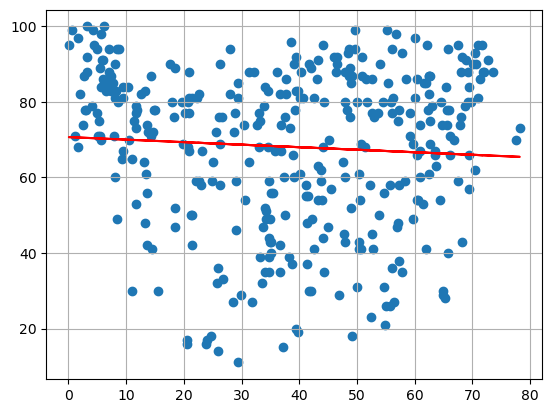

In [44]:
# Northern Hemisphere
humidity_north = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
humidity_north

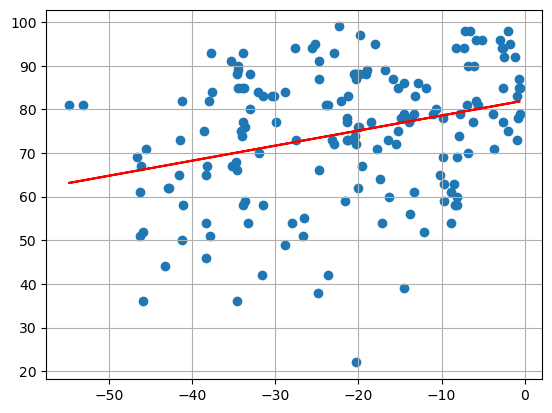

In [45]:
# Southern Hemisphere
humidity_south = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
humidity_south

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

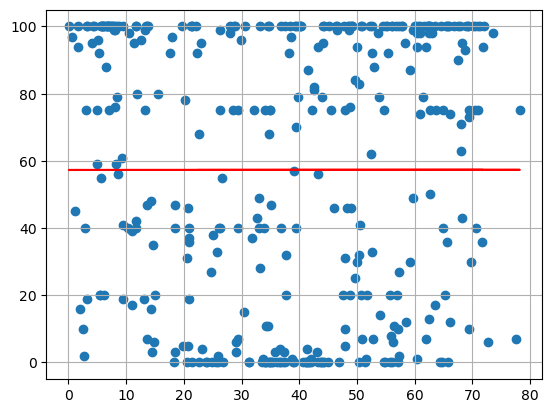

In [46]:
# Northern Hemisphere
cloud_north = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
cloud_north

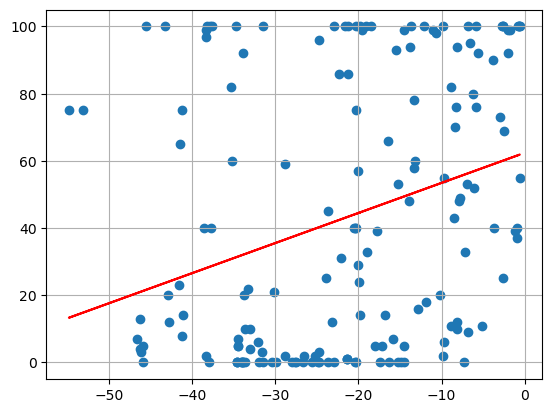

In [47]:
# Southern Hemisphere
cloud_south = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
cloud_south

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

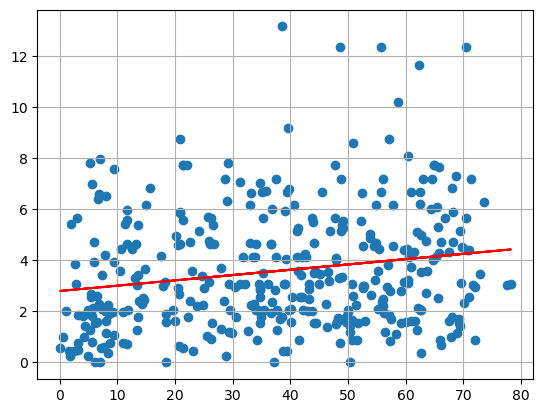

In [48]:
# Northern Hemisphere
wind_north = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
wind_north

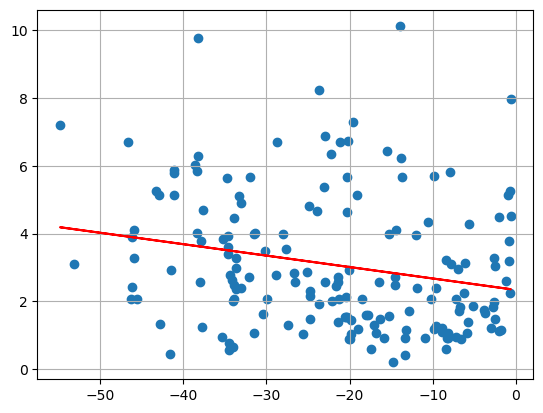

In [49]:
wind_south = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
wind_south

**Discussion about the linear relationship:** We can see that